## Load libraries

In [1]:
import os
import pandas as pd
import numpy as np
import h5py
from sklearn.metrics import classification_report

from alphai_watson.performance import GANPerformanceAnalysis
from alphai_watson.transformer import NullTransformer
from alphai_rickandmorty_oracle.datasource.mnist import MNISTDataSource
from alphai_rickandmorty_oracle.detective import RickAndMortyDetective
from alphai_rickandmorty_oracle.model_mnist import RickAndMorty

from matplotlib import pyplot as plt

/opt/anaconda/envs/ai/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/opt/anaconda/envs/ai/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
DEBUG:matplotlib:CACHEDIR=/home/ubuntu/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/ubuntu/.cache/matplotlib/fontList.json
DEBUG:matplotlib.backends:backend agg version v2.2


Enabling weight norm
Uppercase local vars:
	BATCH_SIZE: 50
	CRITIC_ITERS: 5
	DEFAULT_FIT_EPOCHS: 1000
	DEFAULT_LEARN_RATE: 0.0001
	DEFAULT_TRAIN_ITERS: 5000
	DEFAULT_Z_DIM: 128
	DIAGNOSIS_LEARN_RATE: 0.01
	DIM: 64
	DISC_FILTER_SIZE: 5
	LAMBDA: 10
	LAMBDA_2: 2.0
	OUTPUT_DIM: 784


## Define MNIST Datasource

In [2]:
file_path = '../../tests/resources'

abnormal_digit = 4

# Train and test data file
train_data_file = os.path.join(file_path, 'mnist_data_train_abnormalclass-{}.hd5'.format(abnormal_digit))
test_data_file = os.path.join(file_path, 'mnist_data_test_abnormalclass-{}.hd5'.format(abnormal_digit))

# Model parameters
n_sensors = 28
n_timesteps = 784 // n_sensors

train_data_source = MNISTDataSource(source_file=train_data_file, 
                                    transformer=NullTransformer(number_of_timesteps=n_timesteps,
                                                                number_of_sensors=n_sensors))
test_data_source = MNISTDataSource(source_file=test_data_file,
                                   transformer=NullTransformer(number_of_timesteps=n_timesteps,
                                                               number_of_sensors=n_sensors))

train_data = train_data_source.get_train_data('NORMAL')

DEBUG:root:Start file parsing.
DEBUG:root:Processing sample type NORMAL.
DEBUG:root:End file parsing.
DEBUG:root:Start file parsing.
DEBUG:root:Processing sample type ABNORMAL.
DEBUG:root:Processing sample type NORMAL.
DEBUG:root:End file parsing.


### Plot input images to verify correctness

DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown
DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/opt/anaconda/envs/ai/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


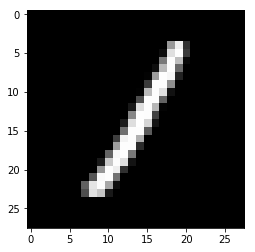

In [3]:
%matplotlib inline
# First row is first image
idx = len(train_data.data)
image = train_data.data[np.random.randint(0, idx)]

# h_train = h5py.File(test_data_file)
# image = np.array(h_train.get('ABNORMAL'))[156]

# 784 columns correspond to 28x28 image
plottable_image = np.reshape(image, (28, 28))

# Plot the image
plt.imshow(plottable_image, cmap='gray')
plt.show()

## Define Model

DEBUG:root:Starting session
DEBUG:root:Start training loop...
INFO:root:Initialising Model
INFO:root:Training iteration 0 of 1000


iter 0	train disc cost	4.428248882293701	time	1.5168581008911133
iter 1	train disc cost	4.2348175048828125	time	0.5524365901947021
iter 2	train disc cost	3.9532229900360107	time	0.41608119010925293
iter 3	train disc cost	3.901400089263916	time	0.40085935592651367
iter 4	train disc cost	3.6110353469848633	time	0.39979124069213867


INFO:root:Saving fake samples to png: [[4.61014450e-01 3.74097764e-01 3.50954890e-01 ... 6.07122784e-05
  6.20177155e-03 8.23635515e-03]
 [4.56076324e-01 3.81213307e-01 3.40714008e-01 ... 3.27766407e-04
  1.07325185e-02 1.59083027e-02]
 [4.60214376e-01 3.79023522e-01 3.67336780e-01 ... 1.46459497e-04
  1.07300235e-02 1.62608474e-02]
 ...
 [4.55952317e-01 3.76668245e-01 3.56168360e-01 ... 1.21607072e-05
  3.75682185e-03 1.01751545e-02]
 [4.63591874e-01 3.80786777e-01 3.46070737e-01 ... 6.10267089e-05
  1.29821738e-02 1.39081068e-02]
 [4.55402642e-01 3.85442883e-01 3.57947856e-01 ... 4.98293484e-05
  9.24734864e-03 1.54192811e-02]]
INFO:root:Training iteration 100 of 1000


iter 99	train disc cost	0.3573945164680481	time	0.40026208476016395


INFO:root:Saving fake samples to png: [[2.5365663e-01 4.8569821e-02 5.6136690e-02 ... 1.7004606e-07
  6.2436110e-04 7.2923815e-04]
 [2.3390056e-01 4.3921534e-02 4.8503704e-02 ... 1.4926727e-06
  1.2409862e-03 1.3096344e-03]
 [2.5765115e-01 6.0960431e-02 6.9832176e-02 ... 7.2336042e-07
  1.5556100e-03 1.8743664e-03]
 ...
 [2.2841951e-01 3.4150448e-02 4.3255620e-02 ... 2.1813401e-08
  3.3704742e-04 5.3046201e-04]
 [2.7044743e-01 5.4784231e-02 6.2392019e-02 ... 2.7314360e-07
  1.7650375e-03 1.6097350e-03]
 [2.6425135e-01 6.1993506e-02 7.3302023e-02 ... 1.6329700e-07
  1.2379104e-03 1.5803094e-03]]
INFO:root:Training iteration 200 of 1000


iter 199	train disc cost	-0.34432151913642883	time	0.39310197353363036


INFO:root:Saving fake samples to png: [[1.02675892e-01 6.04877761e-03 1.10658603e-02 ... 3.34118244e-09
  2.16666929e-04 8.01709830e-05]
 [8.43622535e-02 4.57904069e-03 8.36094841e-03 ... 4.95554566e-08
  5.42537775e-04 1.81959127e-04]
 [1.08515583e-01 8.14239681e-03 1.46377515e-02 ... 1.87454905e-08
  5.49992197e-04 1.96080742e-04]
 ...
 [7.70516172e-02 2.93354969e-03 6.42014062e-03 ... 3.64495906e-10
  1.03997008e-04 4.37038507e-05]
 [1.06209323e-01 5.98140713e-03 1.09367603e-02 ... 1.25204807e-08
  7.32600747e-04 2.16936693e-04]
 [1.11638740e-01 8.38144869e-03 1.54593075e-02 ... 5.87775295e-09
  4.60023177e-04 1.77630951e-04]]
INFO:root:Training iteration 300 of 1000


iter 299	train disc cost	-0.5144424438476562	time	0.39531742095947264


INFO:root:Saving fake samples to png: [[2.1927837e-02 9.5946441e-04 1.4042230e-03 ... 2.4927296e-10
  1.1862005e-02 1.7536526e-05]
 [1.8986536e-02 9.4048365e-04 1.3328582e-03 ... 7.4716029e-09
  2.0419085e-02 4.7415480e-05]
 [2.9247774e-02 1.8530876e-03 2.6159026e-03 ... 1.8835042e-09
  1.8564193e-02 4.4828659e-05]
 ...
 [1.7511239e-02 5.9283088e-04 9.5579738e-04 ... 1.9909163e-11
  7.5985449e-03 7.5687408e-06]
 [2.4074130e-02 1.0688412e-03 1.5796090e-03 ... 8.9967017e-10
  2.0704942e-02 4.1857937e-05]
 [3.2937787e-02 2.2059064e-03 3.1364381e-03 ... 5.1824883e-10
  1.5864706e-02 3.8656017e-05]]
INFO:root:Training iteration 400 of 1000


iter 399	train disc cost	-0.5397096872329712	time	0.39701478004455565


INFO:root:Saving fake samples to png: [[1.8389037e-02 1.3514040e-03 1.3920498e-03 ... 8.8199427e-11
  1.3085728e-02 6.0479288e-05]
 [1.7180992e-02 1.4670814e-03 1.4619902e-03 ... 2.0409441e-09
  2.4542077e-02 1.0544957e-04]
 [2.5785739e-02 2.5946074e-03 2.6272146e-03 ... 4.8812077e-10
  1.9440047e-02 1.1356603e-04]
 ...
 [1.6677141e-02 1.0430060e-03 1.0948635e-03 ... 9.6826150e-12
  9.1518126e-03 2.9030542e-05]
 [2.2291370e-02 1.7019582e-03 1.7490516e-03 ... 3.1893752e-10
  2.4881599e-02 1.2040323e-04]
 [2.8531665e-02 2.9167593e-03 3.0943311e-03 ... 1.7188301e-10
  1.7198006e-02 1.1000750e-04]]
INFO:root:Training iteration 500 of 1000


iter 499	train disc cost	-0.4039188623428345	time	0.39268635272979735


INFO:root:Saving fake samples to png: [[1.6623629e-02 1.3442835e-03 1.6872589e-03 ... 1.8425657e-10
  1.7269007e-04 3.5455921e-06]
 [1.4560060e-02 1.2780008e-03 1.6300676e-03 ... 3.1651302e-09
  4.4714936e-04 8.0599830e-06]
 [2.3245249e-02 2.4934204e-03 3.0580247e-03 ... 1.0941006e-09
  3.7121092e-04 9.7949560e-06]
 ...
 [1.1980386e-02 7.4334291e-04 1.0152076e-03 ... 3.4366437e-11
  1.0565974e-04 2.1225585e-06]
 [1.8340057e-02 1.5134412e-03 1.8964767e-03 ... 6.6190536e-10
  5.1157747e-04 9.7823440e-06]
 [2.4838148e-02 2.6745291e-03 3.5176740e-03 ... 5.4290261e-10
  3.8325455e-04 1.0922102e-05]]
INFO:root:Training iteration 600 of 1000


iter 599	train disc cost	-0.5670454502105713	time	0.3971405053138733


INFO:root:Saving fake samples to png: [[1.0091662e-02 9.5274305e-04 5.4304354e-04 ... 6.6855868e-11
  6.3407883e-06 9.6287704e-07]
 [8.0246730e-03 8.6578046e-04 4.6836914e-04 ... 1.2271776e-09
  2.1641868e-05 2.5905447e-06]
 [1.2534842e-02 1.5327550e-03 9.0392376e-04 ... 4.5266227e-10
  1.5489812e-05 2.6563007e-06]
 ...
 [6.4308592e-03 4.6154292e-04 2.6859780e-04 ... 1.0958058e-11
  2.7352628e-06 4.9984544e-07]
 [9.8916218e-03 9.2886982e-04 5.3888041e-04 ... 3.6094130e-10
  1.9423109e-05 2.5916836e-06]
 [1.5286803e-02 1.8679713e-03 1.1933560e-03 ... 1.7811611e-10
  1.3684605e-05 2.5741847e-06]]
INFO:root:Training iteration 700 of 1000


iter 699	train disc cost	-0.6002811193466187	time	0.3952562117576599


INFO:root:Saving fake samples to png: [[1.9027239e-03 1.0668725e-02 1.0704250e-04 ... 3.3132921e-12
  2.4269210e-07 1.0120374e-05]
 [1.4883074e-03 1.0289821e-02 8.9861249e-05 ... 7.0238558e-11
  1.0452737e-06 2.0718675e-05]
 [2.6528311e-03 1.4213149e-02 1.8626679e-04 ... 3.2358997e-11
  8.4777309e-07 2.5337265e-05]
 ...
 [1.0510981e-03 6.6642356e-03 4.3297852e-05 ... 3.3998363e-13
  6.5387390e-08 5.6656177e-06]
 [1.7321240e-03 9.4278697e-03 9.2575305e-05 ... 2.7232331e-11
  1.1946465e-06 2.3601813e-05]
 [2.4707713e-03 1.3443950e-02 1.7053145e-04 ... 1.0058326e-11
  6.8727627e-07 2.2942710e-05]]
INFO:root:Training iteration 800 of 1000


iter 799	train disc cost	-0.42987632751464844	time	0.39316984415054324


INFO:root:Saving fake samples to png: [[1.51772681e-03 8.92419077e-04 1.33743539e-04 ... 9.09305563e-13
  3.90343985e-07 3.37006924e-07]
 [1.01781473e-03 7.03961356e-04 9.22092368e-05 ... 2.06291356e-11
  1.75340506e-06 9.31772604e-07]
 [1.94642087e-03 1.30335847e-03 2.04212483e-04 ... 8.80492901e-12
  1.54963880e-06 1.07565518e-06]
 ...
 [6.19611819e-04 3.23736051e-04 3.82851140e-05 ... 8.78489040e-14
  1.44541971e-07 1.74823924e-07]
 [1.41347386e-03 7.99576694e-04 1.14720075e-04 ... 8.47561604e-12
  1.94303652e-06 1.11138991e-06]
 [1.47063204e-03 9.31984454e-04 1.42155346e-04 ... 4.62911393e-12
  1.51856784e-06 1.33671983e-06]]
INFO:root:Training iteration 900 of 1000


iter 899	train disc cost	-0.573319673538208	time	0.3998569941520691


INFO:root:Saving fake samples to png: [[1.3232083e-03 4.7624414e-04 1.1566792e-04 ... 4.0940476e-12
  3.0144039e-07 3.2598669e-07]
 [6.9993298e-04 2.7810811e-04 6.0922572e-05 ... 6.1651628e-11
  1.3491144e-06 8.4067614e-07]
 [1.3844570e-03 5.6655810e-04 1.4176535e-04 ... 3.2461426e-11
  1.3460749e-06 1.1045893e-06]
 ...
 [4.5009539e-04 1.4666423e-04 2.9254208e-05 ... 3.2680881e-13
  1.1017765e-07 1.6266331e-07]
 [1.0438035e-03 3.6819803e-04 8.5199885e-05 ... 4.1060613e-11
  2.1063258e-06 1.3634809e-06]
 [1.1569897e-03 4.6487994e-04 1.1700577e-04 ... 1.6081407e-11
  1.4131466e-06 1.4440766e-06]]
DEBUG:root:Training complete.


iter 999	train disc cost	-0.5966388583183289	time	0.39372283458709717


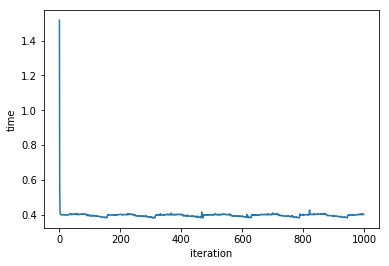

In [4]:
model_dir = './mnist_models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

batch_size = 64
output_dimensions = 784
train_iters = 1000
plot_save_path = model_dir

model = RickAndMorty(batch_size=batch_size, 
                     output_dimensions=output_dimensions, 
                     train_iters=train_iters,
                     plot_save_path=plot_save_path)

detective = RickAndMortyDetective(model_configuration={
    'model': model,
    'batch_size': batch_size,
    'output_dimensions': output_dimensions,
    'train_iters': train_iters,
    'save_path' : '{}/MNIST-abnormalclass-{}'.format(model_dir, abnormal_digit),
    'plot_save_path' : plot_save_path
})

detective.train(train_data)

## Evaluate Results

### Load trained model

In [5]:
# detective = RickAndMortyDetective(model_configuration={
#     'batch_size': 64,
#     'output_dimensions': 784,
#     'train_iters': 300,
#     'load_path' : '{}/MNIST-abnormalclass-{}'.format(model_dir, abnormal_digit),
#     'plot_save_path' : model_dir
# })

### Load test data


In [6]:
# Get test data
test_data_normal = test_data_source.get_train_data('NORMAL')
test_data_abnormal = test_data_source.get_train_data('ABNORMAL')
test_data = test_data_source.get_train_data('ALL')

# Ground truth for ABNORMAL data is 1 , ground truth for NORMAL data is 0
n1 = np.ones(len(test_data_abnormal.data))
n2 = np.zeros(len(test_data_normal.data))
expected_truth = np.hstack((n1, n2))

### Calculate ROC Score

In [7]:
detection_result = detective.detect(test_data)

roc_score = GANPerformanceAnalysis({}).analyse(
  detection_result=detection_result.data,
  expected_truth=expected_truth
)

print('ROC Score: {}'.format(roc_score))

INFO:root:Running detector on <alphai_watson.datasource.Sample object at 0x7f68957fac50>
INFO:root:Detection completed in 1.0741635728627443


ROC Score: 0.5540909337823008


### Generate classification report

In [11]:
# Save ; Compared ground truth to np.rint(detection_result.data), which rounds probability <0.5 to 0 and >0.5 to 1
target_names = ['NORMAL', 'ABNORMAL']
print(classification_report(expected_truth, np.rint(detection_result.data), target_names=target_names))

              precision    recall  f1-score   support

      NORMAL       1.00      0.00      0.00     12636
    ABNORMAL       0.35      1.00      0.52      6824

   micro avg       0.35      0.35      0.35     19460
   macro avg       0.68      0.50      0.26     19460
weighted avg       0.77      0.35      0.18     19460

